In [64]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('fac_sub.csv')

In [6]:
X = data.drop(columns='faculty_id')
y = data['faculty_id']

In [81]:

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [22]:
pca = PCA(n_components=1200)

In [23]:
pca.fit(X_train)

PCA(n_components=1200)

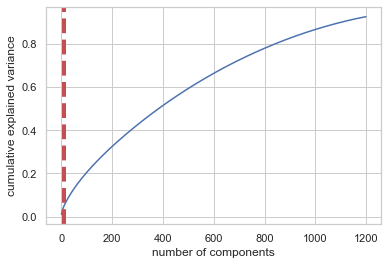

None

In [24]:
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

In [25]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [26]:
rfc = RandomForestClassifier()

In [28]:
rfc.fit(X_train_pca, y_train)

RandomForestClassifier()

In [33]:
y_pred = rfc.predict(X_test_pca)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        2973       0.33      0.62      0.43        91
       20422       0.16      0.07      0.10        96
     2161062       0.22      0.22      0.22        90
     2173844       0.21      0.16      0.18        76
     2231267       0.22      0.30      0.26        86
     2231275       0.27      0.25      0.26       100
     2231790       0.32      0.22      0.26        96

    accuracy                           0.26       635
   macro avg       0.25      0.26      0.24       635
weighted avg       0.25      0.26      0.24       635



In [36]:
# search hyper params

In [39]:
rfc = RandomForestClassifier()

In [37]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [67]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)

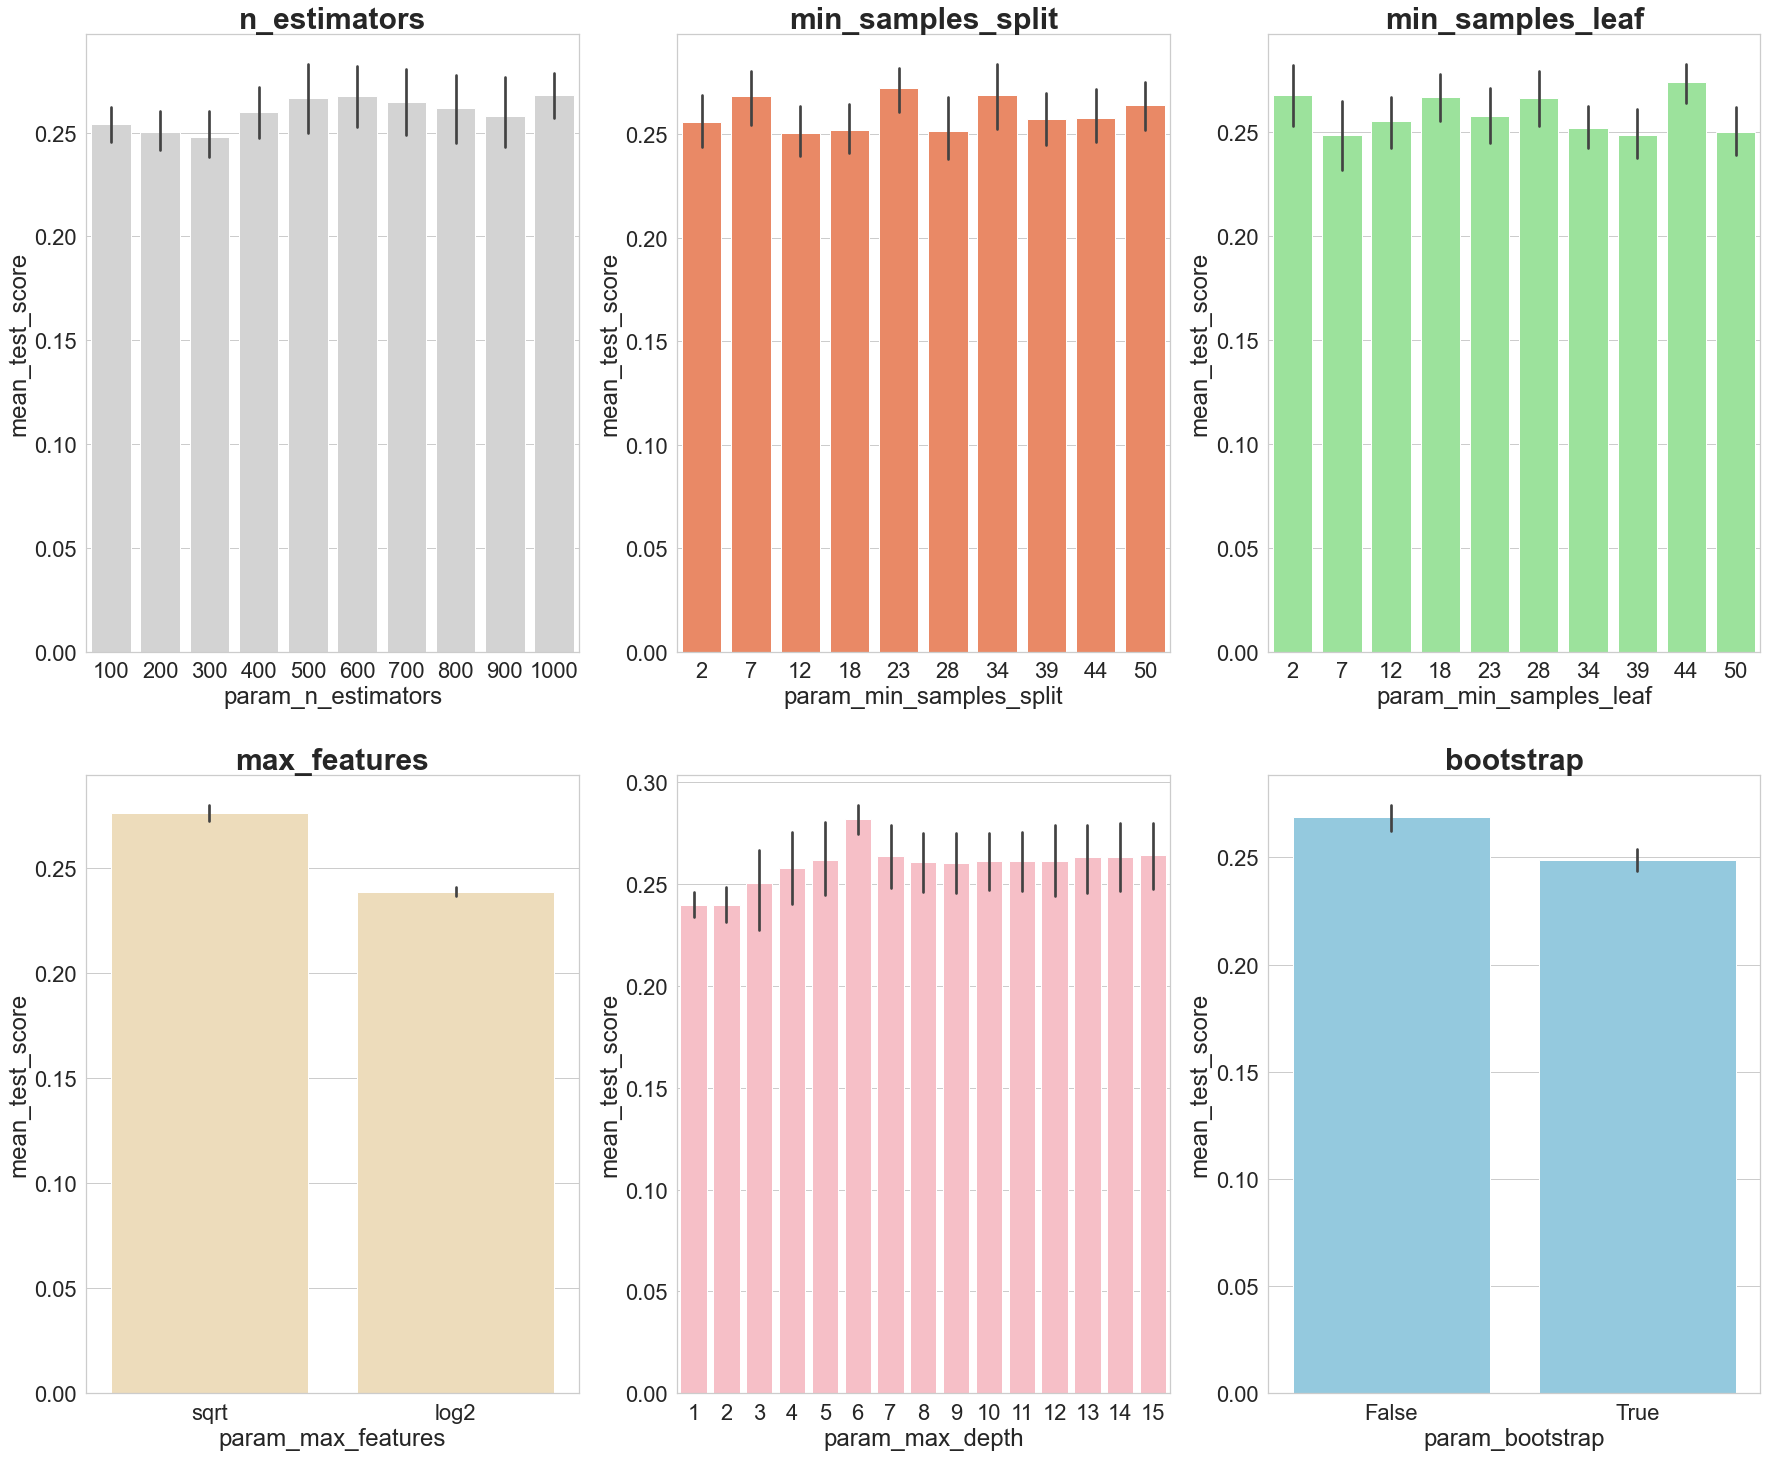

In [69]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
#axs[0,0].set_ylim([.83,.93])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
#axs[0,1].set_ylim([.85,.93])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
#axs[0,2].set_ylim([.80,.93])
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
#axs[1,0].set_ylim([.88,.92])
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
#axs[1,1].set_ylim([.80,.93])
#axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
#axs[1,2].set_ylim([.88,.92])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

In [71]:
n_estimators = [500, 600, 1000]
max_features = ['sqrt']
max_depth = [6, 7]
min_samples_split = [7, 23, 34]
min_samples_leaf = [2, 18, 28, 44]
bootstrap = [False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [72]:
gs = GridSearchCV(rfc, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_train_pca, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [6, 7],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 18, 28, 44],
                         'min_samples_split': [7, 23, 34],
                         'n_estimators': [500, 600, 1000]},
             verbose=1)

In [73]:
gs.best_params_

{'bootstrap': False,
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 28,
 'min_samples_split': 34,
 'n_estimators': 500}

In [75]:
rfc_paramd = RandomForestClassifier(bootstrap=False,
                                   max_depth=6,
                                   max_features='sqrt',
                                   min_samples_leaf=28,
                                   min_samples_split=34,
                                   n_estimators=500)

In [76]:
rfc_paramd.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=False, max_depth=6, max_features='sqrt',
                       min_samples_leaf=28, min_samples_split=34,
                       n_estimators=500)

In [77]:
y_pred = rfc_paramed.predict(X_test_pca)

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        2973       0.27      0.69      0.39        91
       20422       0.17      0.01      0.02        96
     2161062       0.14      0.08      0.10        90
     2173844       0.44      0.05      0.09        76
     2231267       0.26      0.43      0.33        86
     2231275       0.31      0.34      0.33       100
     2231790       0.43      0.41      0.42        96

    accuracy                           0.29       635
   macro avg       0.29      0.29      0.24       635
weighted avg       0.29      0.29      0.24       635



In [79]:
from sklearn.linear_model import LogisticRegression

In [93]:
lr = LogisticRegression(C=901.0)

In [94]:
lr.fit(X_train, y_train)

S:\Users\Администратор\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=901.0)

In [95]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        2973       0.36      0.63      0.46        89
       20422       0.36      0.38      0.37        81
     2161062       0.30      0.19      0.23       101
     2173844       0.36      0.32      0.34        87
     2231267       0.66      0.41      0.50       103
     2231275       0.31      0.31      0.31        84
     2231790       0.41      0.48      0.44        90

    accuracy                           0.39       635
   macro avg       0.39      0.39      0.38       635
weighted avg       0.40      0.39      0.38       635



In [104]:
pd.DataFrame({'res': y_pred, 'truely': y_test}).to_csv('res_LR_901.csv',
                                                      index=False)

In [98]:
lr_pca = LogisticRegression(C=901.0)

In [99]:
lr_pca.fit(X_train_pca, y_train)

S:\Users\Администратор\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=901.0)

In [100]:
y_pred = lr_pca.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        2973       0.09      0.09      0.09        89
       20422       0.11      0.12      0.12        81
     2161062       0.16      0.14      0.15       101
     2173844       0.16      0.14      0.15        87
     2231267       0.24      0.19      0.22       103
     2231275       0.13      0.15      0.14        84
     2231790       0.10      0.13      0.12        90

    accuracy                           0.14       635
   macro avg       0.14      0.14      0.14       635
weighted avg       0.15      0.14      0.14       635



In [88]:
lr_ft = LogisticRegression()

In [87]:
C = [float(x) for x in range(1, 1000, 10)]

In [96]:
gs = GridSearchCV(lr_ft, {'C': C}, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_train_pca, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


S:\Users\Администратор\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1.0, 101.0, 201.0, 301.0, 401.0, 501.0, 601.0,
                               701.0, 801.0, 901.0]},
             verbose=1)

In [97]:
gs.best_params_

{'C': 901.0}

{'C': 901.0}

In [101]:
from sklearn.preprocessing import PolynomialFeatures

In [102]:
poly = PolynomialFeatures(degree=7)

In [ ]:
%time poly.fit(X_train)

In [ ]:
import pickle
with open('poly.pickle', 'wb') as f:
    pickle.dump(poly, f)

In [ ]:
X_train_poly = poly.transform(X_train)

In [ ]:
lr_poly = LogisticRegression()

In [ ]:
lr_poly.fit(X_train_poly, y_train)

In [ ]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))